Name : Ibnu Riski <br>
Email : ibnuriski28@gmail.com <br>
Position : Data Analyst (Technology) <br>

# Question 3

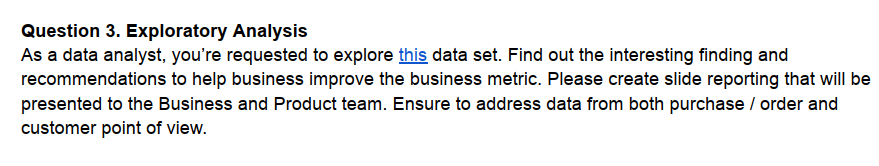

## Exploratory Analysis

### Load the Data

In [47]:
import pandas as pd

# Change the link to a direct link to the file
file_id = "1ME-fMgjeS2w-eQRuDXJ9xH_JL3Kfi786"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

### View Data Summary

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read datasets from Google Drive (ensure direct link to raw files)
file_id = "1ME-fMgjeS2w-eQRuDXJ9xH_JL3Kfi786"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)

# View summary data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Distribution of sales

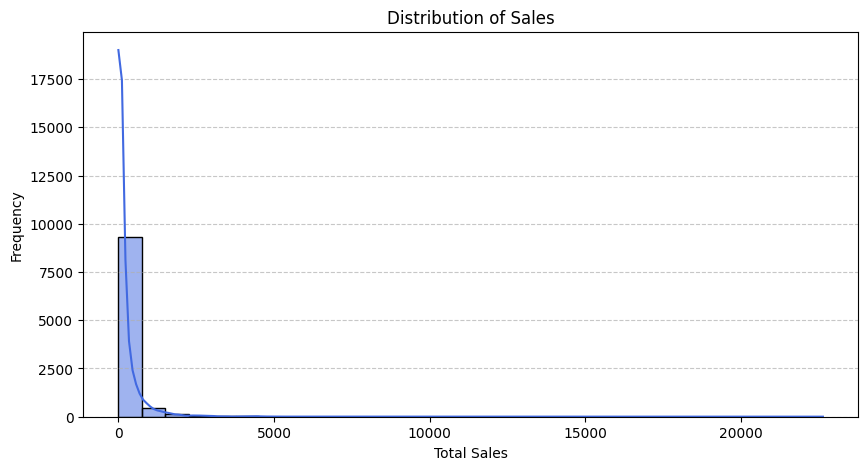

In [49]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Sales"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

> From the sales distribution histogram that has been created, it can be seen that the majority of sales values are at the lower end, while high-value sales are rare. This shows that the sales distribution tends to have a right-skewed distribution-where most transactions occur with small values, while only a few transactions have large values.

### Best-selling products by number of units sold

                                        Product Name  Total Quantity Sold
0                                            Staples                  215
1                                    Staple envelope                  170
2                                  Easy-staple paper                  150
3                            Staples in misc. colors                   86
4                         KI Adjustable-Height Table                   74
5                            Storex Dura Pro Binders                   71
6                            Avery Non-Stick Binders                   71
7  GBC Premium Transparent Covers with Diagonal L...                   67
8         Situations Contoured Folding Chairs, 4/Set                   64
9                         Staple-based wall hangings                   62


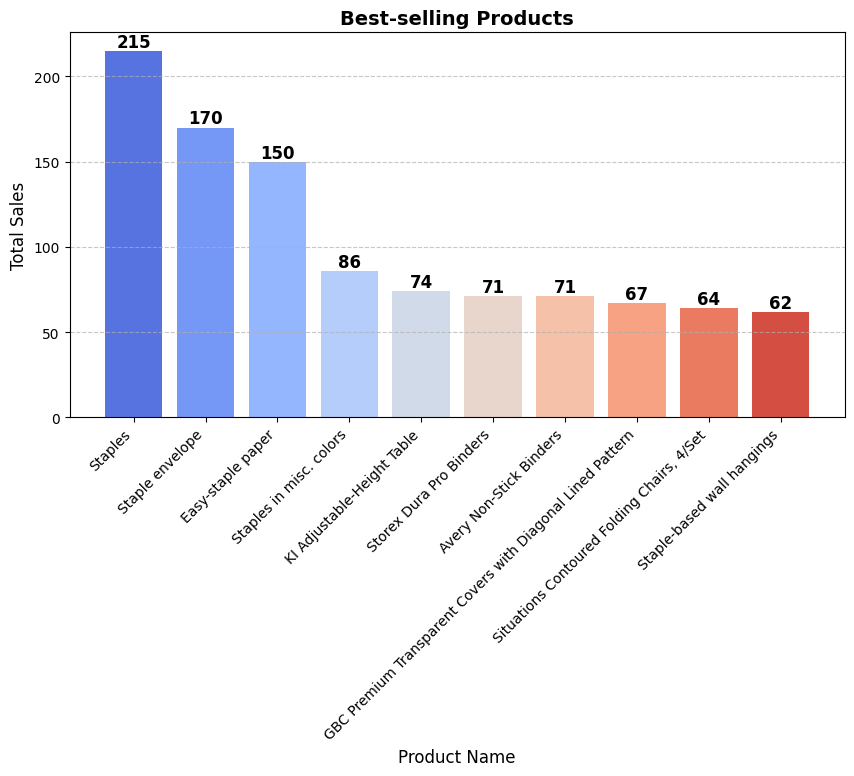

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorize products based on the number of units sold
top_products = df.groupby("Product Name")["Quantity"].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame to display as a table
top_products_df = top_products.reset_index()
top_products_df.columns = ["Product Name", "Total Quantity Sold"]

print(top_products_df)

# Using Seaborn's color palette to make it more interesting
colors = sns.color_palette("coolwarm", len(top_products_df))

plt.figure(figsize=(10, 5))
bars = plt.bar(top_products_df["Product Name"], top_products_df["Total Quantity Sold"], color=colors)
plt.title("Best-selling Products", fontsize=14, fontweight="bold")
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Adding values on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=12, fontweight="bold", color="black"
    )

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Staples was the best-selling product with 215 units sold, far exceeding any other product.
- The difference in number sold between the products is huge, indicating that only a few products truly dominate sales.
- Products with low sales may need promotion or bundling strategies to make them more attractive to customers.
- In products with total sales of 62 to 74, the difference is very close.

### Sales Per Category

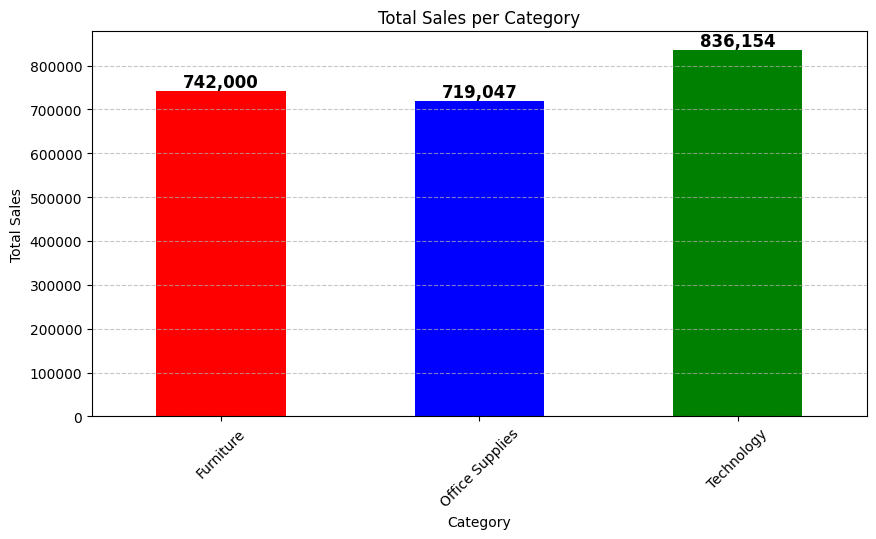

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

category_sales = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(10, 5))
bars = category_sales.plot(kind="bar", color=["red", "blue", "green"])

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=12, fontweight="bold"
    )

plt.title("Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- The figure shows that the Technology category has the highest total sales compared to Furniture and Office Supplies. This indicates that technology products are more in demand or have a higher transaction value.
- Furniture has higher sales than Office Supplies, but is still lower than Technology.
- Office Supplies has the lowest sales, which could mean that products in this category have lower prices or fewer transactions.

### Customers with the highest purchases

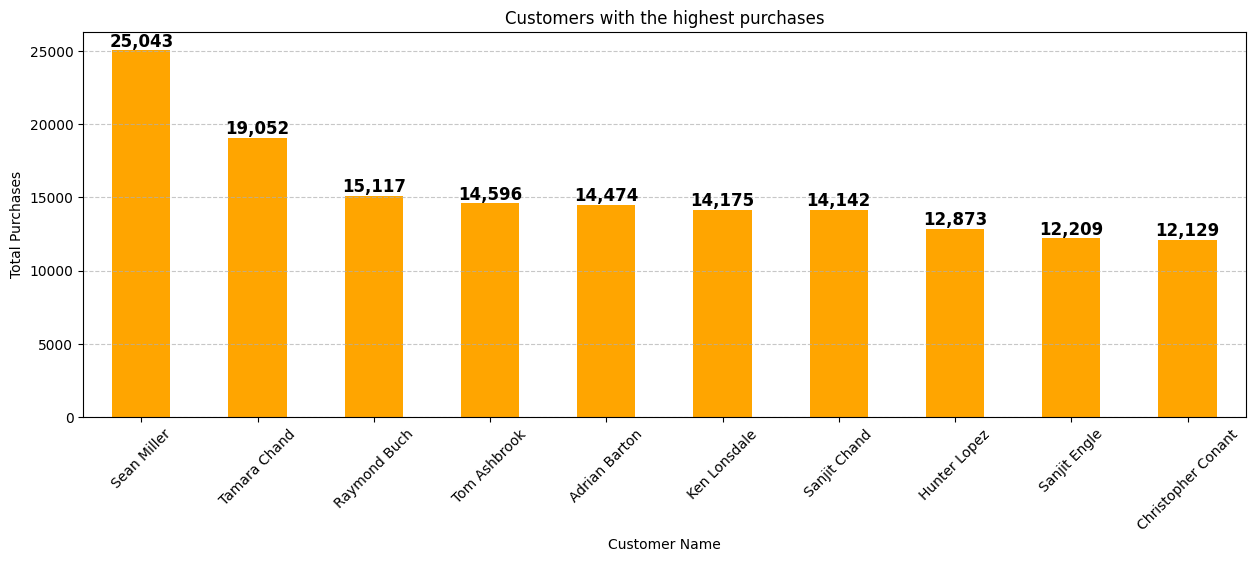

In [52]:
top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 5))
top_customers.plot(kind="bar", color="orange")
plt.title("Customers with the highest purchases")
plt.xlabel("Customer Name")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha="center", va="bottom", fontsize=12, fontweight="bold"
    )

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

 - The customer with the largest total purchase is Sean Miller, who has a much larger transaction than other customers. This suggests that he may be a loyal customer or have significant business needs. In addition, Tamara Chand is also on the list of high-purchasing customers, making her a potential target for loyalty programs or special offers.

- Overall, the best customer list shows a fairly stable distribution pattern - meaning that the business does not rely solely on one or two large customers, but has a broader customer base. From this data, marketing strategies can be focused on improving the retention of key customers, for example through loyalty programs or exclusive offers for those who frequently transact in large quantities.

#### Slide Reporting

<iframe src="https://docs.google.com/presentation/d/1cta-05HOxyI4iucFqfcd0uKGB4_MHIYRwUw3GAoTLg8/edit?usp=sharing" frameborder="0" width="720" height="450" allowfullscreen="true"></iframe>

> For presentation files can be accessed via the following page https://docs.google.com/presentation/d/1cta-05HOxyI4iucFqfcd0uKGB4_MHIYRwUw3GAoTLg8/edit?usp=sharing

# Question 4

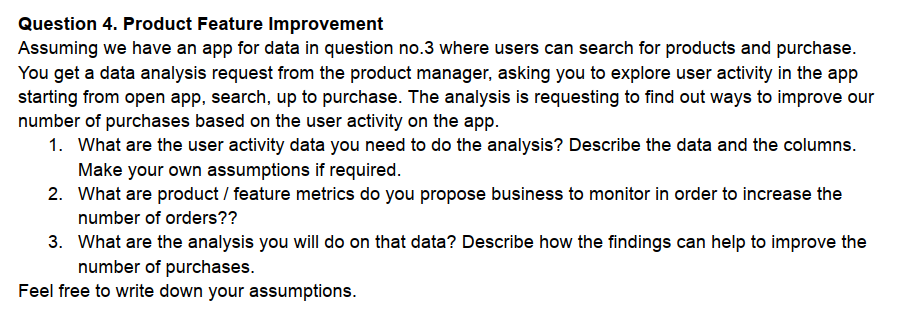

The question is certainly related to Question 3, so here are some answers to Question 4.

## 1. User Activity Data Need

To understand how users interact with the application, we need user behavior data from the initial stage to the purchase. The required data includes:
- User ID → Unique identification of the user.
- Session ID → To track a single session of app usage.
- Timestamp (Open App, Search, Add to Cart, Checkout, Purchase) → When each action is performed.
- Search Query → Keywords used by the user for searching.
- Product Clicked → Which products were clicked after a search.
- Add to Cart Action → Products added to the cart.
- Cart Abandonment → If the user does not proceed to checkout.
- Checkout Status → Whether the user actually completes the transaction.
- Purchase Completion → Whether the purchase is successfully made or not.

## 2. Product / Feature Metrics

To increase the number of purchases, businesses need to monitor several key metrics:

- Search-to-Click Ratio → How often searches lead to product clicks.
- Click-to-Cart Ratio → How frequently product clicks result in items being added to the cart.
- Cart Abandonment Rate → The percentage of users who leave their carts without completing checkout.
- Conversion Rate → The percentage of users who make a purchase after reaching the checkout stage.
- Time Spent Before Checkout → The amount of time users spend before deciding to complete a purchase.
- Product Recommendation Impact → How frequently recommended products contribute to overall sales.

## 3. Data Analysis

Some analysis that can be done to understand buying patterns and how to improve them:
- Funnel Analysis → Tracks the user journey from search to purchase. This helps to know at which stage users exit the process the most.
- Segmentation Analysis → Analyzing purchases based on product category, user demographics, or time of purchase.
- A/B Testing → Trying out new features such as automatic discounts or product recommendations to see their impact on conversions.
- Predictive Modeling → Using historical data to predict which products have the potential to increase sales if given a promo.